In [1]:

##################### Python 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
import numpy as np
import os
import datetime
import dcor
import math
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
import warnings
from scipy import stats
from PIL import Image
warnings.filterwarnings('ignore')
import os
os.chdir('/Users/sss/Desktop/Data')
os.getcwd()
from IPython.core.display import display, HTML
#display(HTML("<style>.container { width: 60% !important; }</style>"))
plt.rcParams['font.family'] = 'AppleGothic'
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
df = pd.read_csv("VIX_History.csv")

In [3]:
df1 = df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    8640 non-null   object 
 1   CLOSE   8640 non-null   float64
dtypes: float64(1), object(1)
memory usage: 135.1+ KB


In [7]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [9]:
df

,DATE,CLOSE
0,1990-01-02,17.24
1,1990-01-03,18.19
2,1990-01-04,19.22
3,1990-01-05,20.11
4,1990-01-08,20.26
...,...,...
8635,2024-03-28,13.01
8636,2024-04-01,13.65
8637,2024-04-02,14.61
8638,2024-04-03,14.33


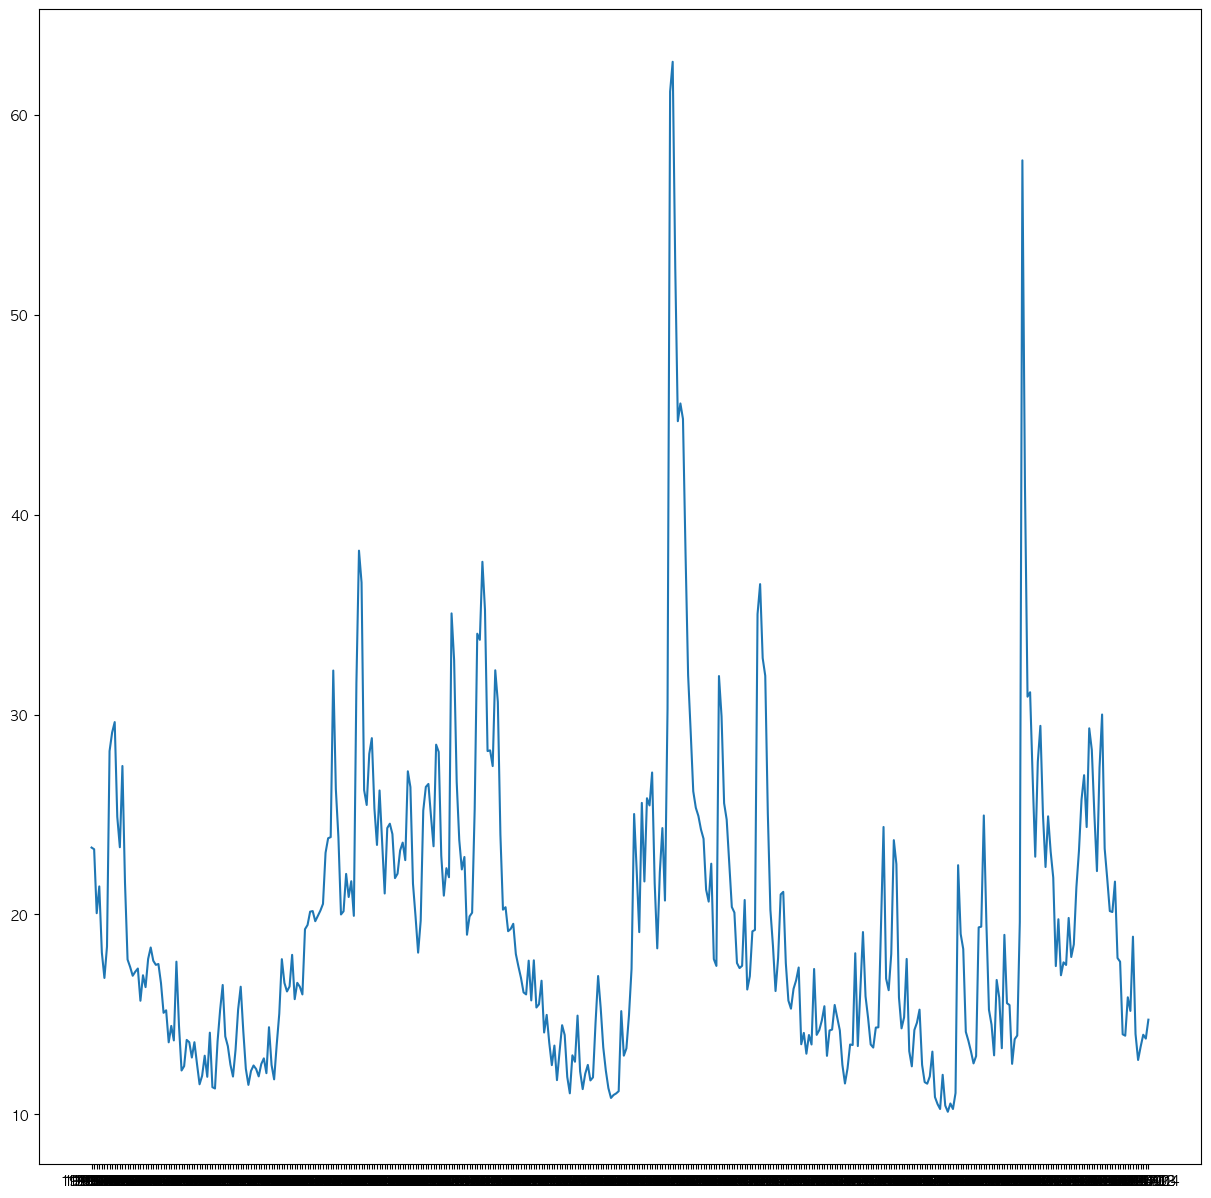

In [22]:
plt.plot(df_new['yearmonth'], df_new['CLOSE'])

plt.gcf().set_size_inches(15,15)

In [23]:
df_new

,yearmonth,CLOSE
0,1990-01,23.347273
1,1990-02,23.262632
2,1990-03,20.062273
3,1990-04,21.403500
4,1990-05,18.097727
...,...,...
407,2023-12,12.718500
408,2024-01,13.388636
409,2024-02,13.980476
410,2024-03,13.787500


In [24]:
from statsmodels.tsa.stattools import adfuller


In [25]:
df_new = df_new.set_index('yearmonth')

In [26]:
adfuller(df_new)

(-4.981525589053741,
 2.4139417644919567e-05,
 2,
 409,
 {'1%': -3.4464400156784927,
  '5%': -2.868632644097719,
  '10%': -2.5705481612974577},
 2191.581977571918)

In [27]:
df_new

,CLOSE
yearmonth,
1990-01,23.347273
1990-02,23.262632
1990-03,20.062273
1990-04,21.403500
1990-05,18.097727
...,...
2023-12,12.718500
2024-01,13.388636
2024-02,13.980476


In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

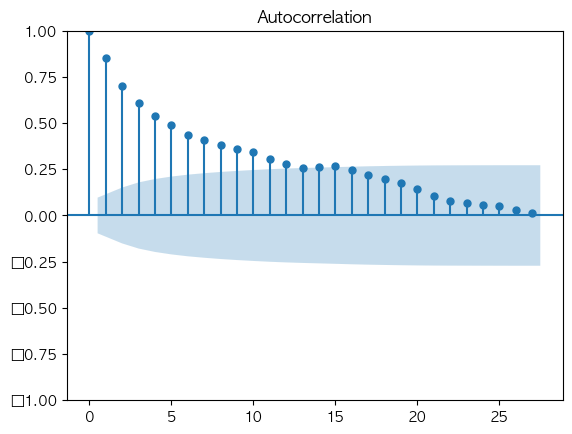

In [29]:
plot_acf(df_new)
plt.show()

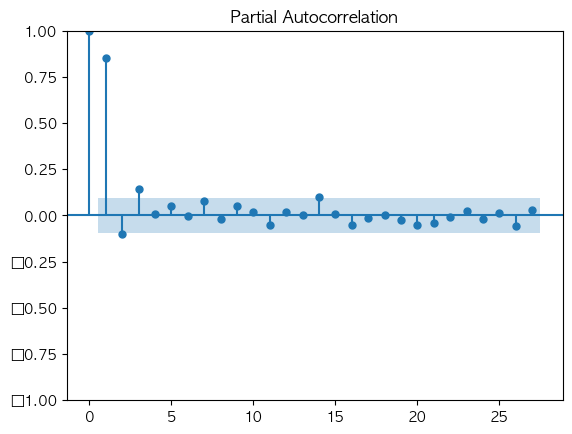

In [33]:
plot_pacf(df_new)
plt.show()

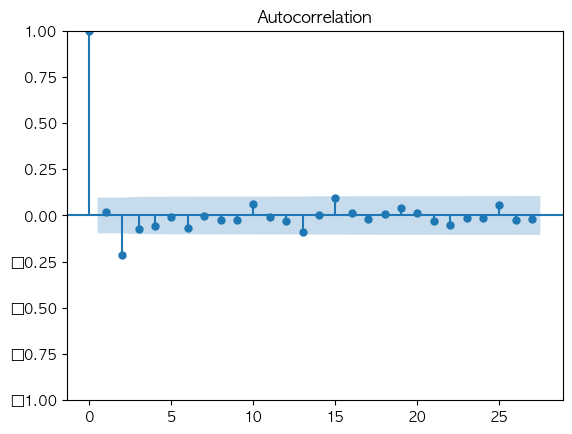

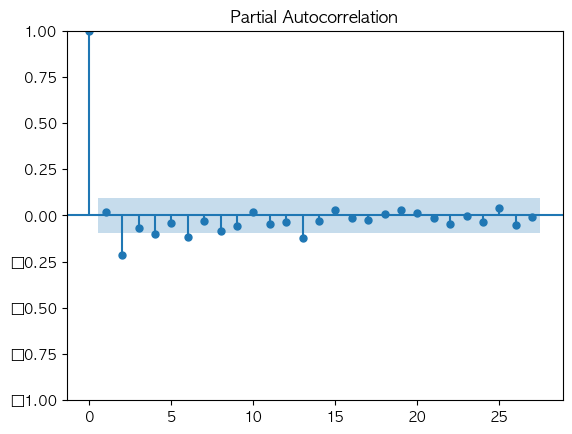

In [35]:
df_check = df_new.diff().dropna()
df_check

plot_acf(df_check)
plt.show()

plot_pacf(df_check)
plt.show()

In [36]:
from statsmodels.tsa.arima.model import ARIMA


In [3]:
import statsmodels.api as sm

In [42]:
mod = sm.tsa.statespace.SARIMAX(df_check,
                                order=(1,1,1),
                                seasonal_order = (1,1,1,12),
                                enforce_stationarity = False,
                                enforce_invertibility = False)

In [45]:
results =  mod.fit()
results.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92496D+00    |proj g|=  2.19074D-01

At iterate    5    f=  2.84290D+00    |proj g|=  1.46574D-01

At iterate   10    f=  2.72054D+00    |proj g|=  2.04344D-01

At iterate   15    f=  2.68509D+00    |proj g|=  4.79789D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     71      2     0     0   1.858D-03   2.685D+00
  F =   2.6848564241080153     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              CLOSE   No. Observations:                  411
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1103.476
Date:                            Fri, 05 Apr 2024   AIC                           2216.952
Time:                                    12:46:59   BIC                           2236.705
Sample:                                02-01-1990   HQIC                          2224.787
                                     - 04-01-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0095      0.035      0.267      0.789      -0.060       0.079
ma.L1         -1.0000     44.648     -0.022      0.982     -88.509      86.509
ar.S.L12    -2.48e-05      0.056     -0.000      1.000      -0.111       0.111
ma.S.L12      -1.0000    142.879     -0.007      0.994    -281.037     279.037
sigma2        16.4600   2492.935      0.007      0.995   -4869.603    4902.523
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             12208.17
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               2.56   Skew:                             3.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
df_check

,CLOSE
yearmonth,
1990-02,-0.084641
1990-03,-3.200359
1990-04,1.341227
1990-05,-3.305773
1990-06,-1.275346
...,...
2023-12,-1.300591
2024-01,0.670136
2024-02,0.591840


In [48]:
pred = results.get_prediction(start=pd.to_datetime('1990-02'), end = pd.to_datetime('2024-04'), dynamic = False)
pred

In [51]:
df_new

,CLOSE
yearmonth,
1990-01,23.347273
1990-02,23.262632
1990-03,20.062273
1990-04,21.403500
1990-05,18.097727
...,...
2023-12,12.718500
2024-01,13.388636
2024-02,13.980476


In [50]:
df_check

,CLOSE
yearmonth,
1990-02,-0.084641
1990-03,-3.200359
1990-04,1.341227
1990-05,-3.305773
1990-06,-1.275346
...,...
2023-12,-1.300591
2024-01,0.670136
2024-02,0.591840


In [49]:
pred.conf_int()


,lower CLOSE,upper CLOSE
1990-02-01,-3394.757202,3394.757202
1990-03-01,-2771.945237,2771.775421
1990-04-01,-2775.076370,2768.646250
1990-05-01,-2770.498725,2773.223895
1990-06-01,-2775.188907,2768.533713
...,...,...
2023-12-01,-9.197347,7.004409
2024-01-01,-8.272909,7.928422
2024-02-01,-7.791364,8.409547
2024-03-01,-7.433292,8.763675


In [57]:
df_check

,CLOSE
yearmonth,
1990-02,-0.084641
1990-03,-3.200359
1990-04,1.341227
1990-05,-3.305773
1990-06,-1.275346
...,...
2023-12,-1.300591
2024-01,0.670136
2024-02,0.591840


In [62]:
df_check.index[1] 

'1990-03'

In [63]:
df_check.index[1] 

'1990-03'

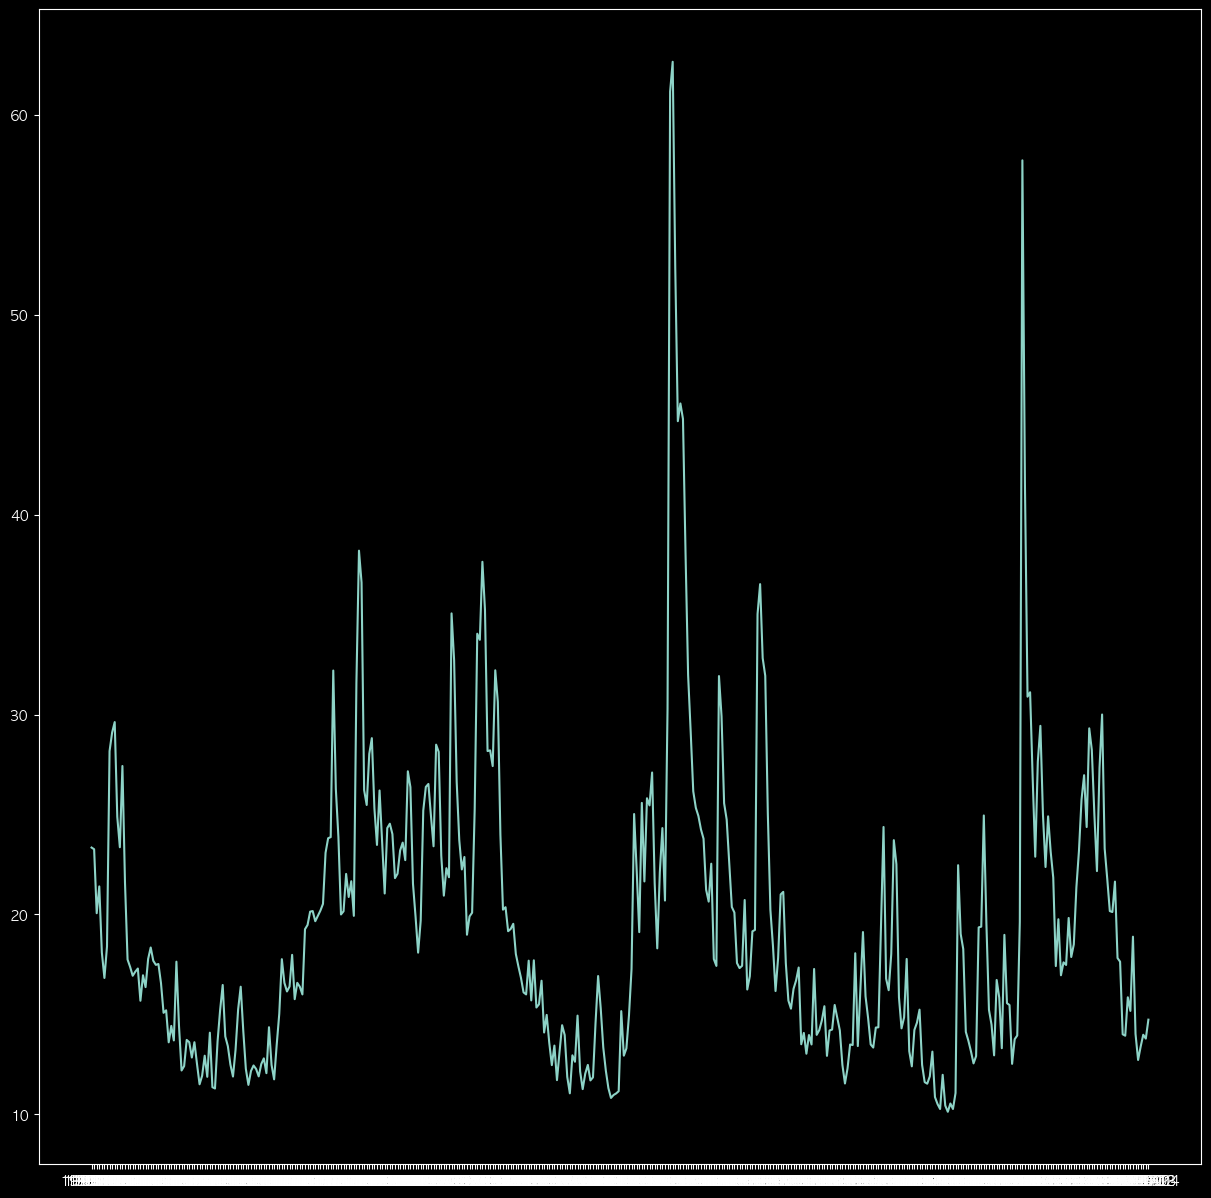

In [71]:
plt.style.use(['dark_background'])
plt.plot(df_new)


plt.gcf().set_size_inches(15,15)

In [73]:
df_check

,CLOSE
yearmonth,
1990-02,-0.084641
1990-03,-3.200359
1990-04,1.341227
1990-05,-3.305773
1990-06,-1.275346
...,...
2023-12,-1.300591
2024-01,0.670136
2024-02,0.591840


In [89]:
df_new

,CLOSE
yearmonth,
1990-01,23.347273
1990-02,23.262632
1990-03,20.062273
1990-04,21.403500
1990-05,18.097727
...,...
2023-12,12.718500
2024-01,13.388636
2024-02,13.980476


In [90]:
mod = sm.tsa.statespace.SARIMAX(df_new,
                                order=(1,1,1),
                                seasonal_order = (1,1,1,12),
                                enforce_stationarity = False,
                                enforce_invertibility = False)

resultㄴ = mod.fit()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.79375D+00    |proj g|=  1.20934D-01

At iterate    5    f=  2.69642D+00    |proj g|=  1.54224D-01


 This problem is unconstrained.



At iterate   10    f=  2.67687D+00    |proj g|=  1.07718D-03

At iterate   15    f=  2.67151D+00    |proj g|=  1.51820D-01
  ys=-1.370E-03  -gs= 7.359E-04 BFGS update SKIPPED

At iterate   20    f=  2.66318D+00    |proj g|=  6.89735D-02

At iterate   25    f=  2.65320D+00    |proj g|=  7.14967D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     43      1     1     0   1.893D-05   2.653D+00
  F =   2.6531943375935265     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [91]:
pred = results.get_prediction(start=pd.to_datetime('1990-02-01'), end = pd.to_datetime('2024-04-01'), dynamic = False)

In [86]:
pred

In [98]:
pred = pred.conf_int()
pred['mean'] = pred['']


,lower CLOSE,upper CLOSE
1990-02-01,-3394.757202,3394.757202
1990-03-01,-2771.945237,2771.775421
1990-04-01,-2775.076370,2768.646250
1990-05-01,-2770.498725,2773.223895
1990-06-01,-2775.188907,2768.533713
...,...,...
2023-12-01,-9.197347,7.004409
2024-01-01,-8.272909,7.928422
2024-02-01,-7.791364,8.409547
2024-03-01,-7.433292,8.763675


In [74]:
# import pandas as pd
# from statsmodels.tsa.arima.model import ARIMA

# # ARIMA 모델 생성
# model1_fit = ARIMA(df_check, order=(1, 1, 1))
# model1_fit = model1_fit.fit()

# start_idx = df_check.index[1] 
# forecast1 = model1_fit.predict(start=start_idx)


# # df_d1.plot()
# # forecast1.plot()
# # print(r2_score(df_d1.iloc[1:,:], forecast1))



In [95]:
df_new = df_new.reset_index()
df_new

,yearmonth,CLOSE
0,1990-01,23.347273
1,1990-02,23.262632
2,1990-03,20.062273
3,1990-04,21.403500
4,1990-05,18.097727
...,...,...
407,2023-12,12.718500
408,2024-01,13.388636
409,2024-02,13.980476
410,2024-03,13.787500


In [100]:
df2 = pd.read_csv('2011-sentiment-by-topic.csv')

In [101]:
df2

,category_id,file_id,Outlook,Economic Activity,Financial Market,Economic Risks,Consumer Behavior,Inflation
0,2021,20210127,0.073134,-0.037173,-0.004739,-0.037338,-0.112140,-0.030478
1,2021,20210317,0.020324,-0.014581,-0.043937,-0.010748,-0.076112,0.001976
2,2021,20210428,0.062876,0.013302,-0.012473,0.029464,-0.074848,-0.068668
3,2021,20210616,-0.007464,-0.011473,-0.046210,-0.032050,-0.061317,-0.030984
4,2021,20210728,0.015870,-0.045431,-0.053992,-0.088005,-0.067016,-0.016095
5,2021,20210922,0.031370,-0.057864,-0.008965,-0.092059,-0.047702,-0.030596
6,2021,20211103,0.033549,-0.032356,-0.013446,-0.086814,-0.111285,-0.037626
7,2021,20211215,0.044326,0.018387,-0.062534,-0.047230,-0.034845,-0.011964


In [103]:
df

,DATE,CLOSE,year,yearmonth
0,1/2/90,17.24,1990-01-02,1990-01
1,1/3/90,18.19,1990-01-03,1990-01
2,1/4/90,19.22,1990-01-04,1990-01
3,1/5/90,20.11,1990-01-05,1990-01
4,1/8/90,20.26,1990-01-08,1990-01
...,...,...,...,...
8635,3/28/24,13.01,2024-03-28,2024-03
8636,4/1/24,13.65,2024-04-01,2024-04
8637,4/2/24,14.61,2024-04-02,2024-04
8638,4/3/24,14.33,2024-04-03,2024-04


,yearmonth,CLOSE
0,1990-01,23.347273
1,1990-02,23.262632
2,1990-03,20.062273
3,1990-04,21.403500
4,1990-05,18.097727
...,...,...
407,2023-12,12.718500
408,2024-01,13.388636
409,2024-02,13.980476
410,2024-03,13.787500


In [123]:
df2

,category_id,file_id,Outlook,Economic Activity,Financial Market,Economic Risks,Consumer Behavior,Inflation
0,2021,20210127,0.073134,-0.037173,-0.004739,-0.037338,-0.112140,-0.030478
1,2021,20210317,0.020324,-0.014581,-0.043937,-0.010748,-0.076112,0.001976
2,2021,20210428,0.062876,0.013302,-0.012473,0.029464,-0.074848,-0.068668
3,2021,20210616,-0.007464,-0.011473,-0.046210,-0.032050,-0.061317,-0.030984
4,2021,20210728,0.015870,-0.045431,-0.053992,-0.088005,-0.067016,-0.016095
5,2021,20210922,0.031370,-0.057864,-0.008965,-0.092059,-0.047702,-0.030596
6,2021,20211103,0.033549,-0.032356,-0.013446,-0.086814,-0.111285,-0.037626
7,2021,20211215,0.044326,0.018387,-0.062534,-0.047230,-0.034845,-0.011964


In [127]:
df2['year'] = df2['file_id'].astype('str').str[:4]

In [128]:
df2['month'] = df2['file_id'].astype('str').str[4:6]

In [129]:
df2['days'] = df2['file_id'].astype('str').str[6:8]

In [147]:
df2

,category_id,file_id,Outlook,Economic Activity,Financial Market,Economic Risks,Consumer Behavior,Inflation,days,month,year,yearmonth
0,2021,20210127,0.073134,-0.037173,-0.004739,-0.037338,-0.112140,-0.030478,27,01,2021,2021-01
1,2021,20210317,0.020324,-0.014581,-0.043937,-0.010748,-0.076112,0.001976,17,03,2021,2021-03
2,2021,20210428,0.062876,0.013302,-0.012473,0.029464,-0.074848,-0.068668,28,04,2021,2021-04
3,2021,20210616,-0.007464,-0.011473,-0.046210,-0.032050,-0.061317,-0.030984,16,06,2021,2021-06
4,2021,20210728,0.015870,-0.045431,-0.053992,-0.088005,-0.067016,-0.016095,28,07,2021,2021-07
5,2021,20210922,0.031370,-0.057864,-0.008965,-0.092059,-0.047702,-0.030596,22,09,2021,2021-09
6,2021,20211103,0.033549,-0.032356,-0.013446,-0.086814,-0.111285,-0.037626,03,11,2021,2021-11
7,2021,20211215,0.044326,0.018387,-0.062534,-0.047230,-0.034845,-0.011964,15,12,2021,2021-12


In [148]:
df2['yearmonth'] = df2['year'] + df2['month']

In [149]:
df2['yearmonth']

0    202101
1    202103
2    202104
3    202106
4    202107
5    202109
6    202111
7    202112
Name: yearmonth, dtype: object

In [176]:
df

,DATE,CLOSE,year,yearmonth,yearmonth_3month,yearmonth_6month
0,1/2/90,17.24,1990-01-02,199001,199004,199007
1,1/3/90,18.19,1990-01-03,199001,199004,199007
2,1/4/90,19.22,1990-01-04,199001,199004,199007
3,1/5/90,20.11,1990-01-05,199001,199004,199007
4,1/8/90,20.26,1990-01-08,199001,199004,199007
...,...,...,...,...,...,...
8635,3/28/24,13.01,2024-03-28,202403,202406,202409
8636,4/1/24,13.65,2024-04-01,202404,202407,202410
8637,4/2/24,14.61,2024-04-02,202404,202407,202410
8638,4/3/24,14.33,2024-04-03,202404,202407,202410


In [158]:
df['yearmonth'] = df['yearmonth'].astype('str').str.split('-').str[0] + df['yearmonth'].astype('str').str.split('-').str[1]

In [180]:
df['yearmonth_3month'] = df['yearmonth'].astype('int') - 3

In [181]:
df['yearmonth_6month'] = df['yearmonth'].astype('int') - 6

In [182]:
df_3month = df.groupby('yearmonth_3month')['CLOSE'].mean()
df_6month = df.groupby('yearmonth_6month')['CLOSE'].mean()

In [193]:
df_3month = pd.DataFrame(df_3month).reset_index()
df_3month['yearmonth'] = df_3month['yearmonth_3month']
df_3month

,index,yearmonth_3month,CLOSE,yearmonth
0,0,198998,23.347273,198998
1,1,198999,23.262632,198999
2,2,199000,20.062273,199000
3,3,199001,21.403500,199001
4,4,199002,18.097727,199002
...,...,...,...,...
407,407,202309,12.718500,202309
408,408,202398,13.388636,202398
409,409,202399,13.980476,202399
410,410,202400,13.787500,202400


In [192]:
# df_6month = pd.DataFrame(df_6month).reset_index()
df_6month['yearmonth'] = df_6month['yearmonth_6month']
df_6month

,level_0,index,yearmonth_6month,CLOSE,yearmonth
0,0,0,198995,23.347273,198995
1,1,1,198996,23.262632,198996
2,2,2,198997,20.062273,198997
3,3,3,198998,21.403500,198998
4,4,4,198999,18.097727,198999
...,...,...,...,...,...
407,407,407,202306,12.718500,202306
408,408,408,202395,13.388636,202395
409,409,409,202396,13.980476,202396
410,410,410,202397,13.787500,202397


In [185]:
df_nlp = df2
df_nlp

,category_id,file_id,Outlook,Economic Activity,Financial Market,Economic Risks,Consumer Behavior,Inflation,days,month,year,yearmonth
0,2021,20210127,0.073134,-0.037173,-0.004739,-0.037338,-0.112140,-0.030478,27,01,2021,202101
1,2021,20210317,0.020324,-0.014581,-0.043937,-0.010748,-0.076112,0.001976,17,03,2021,202103
2,2021,20210428,0.062876,0.013302,-0.012473,0.029464,-0.074848,-0.068668,28,04,2021,202104
3,2021,20210616,-0.007464,-0.011473,-0.046210,-0.032050,-0.061317,-0.030984,16,06,2021,202106
4,2021,20210728,0.015870,-0.045431,-0.053992,-0.088005,-0.067016,-0.016095,28,07,2021,202107
5,2021,20210922,0.031370,-0.057864,-0.008965,-0.092059,-0.047702,-0.030596,22,09,2021,202109
6,2021,20211103,0.033549,-0.032356,-0.013446,-0.086814,-0.111285,-0.037626,03,11,2021,202111
7,2021,20211215,0.044326,0.018387,-0.062534,-0.047230,-0.034845,-0.011964,15,12,2021,202112


In [190]:
df_3month

,yearmonth_3month,CLOSE
0,198998,23.347273
1,198999,23.262632
2,199000,20.062273
3,199001,21.403500
4,199002,18.097727
...,...,...
407,202309,12.718500
408,202398,13.388636
409,202399,13.980476
410,202400,13.787500


In [196]:
df_nlp

,category_id,file_id,Outlook,Economic Activity,Financial Market,Economic Risks,Consumer Behavior,Inflation,days,month,year,yearmonth
0,2021,20210127,0.073134,-0.037173,-0.004739,-0.037338,-0.112140,-0.030478,27,01,2021,202101
1,2021,20210317,0.020324,-0.014581,-0.043937,-0.010748,-0.076112,0.001976,17,03,2021,202103
2,2021,20210428,0.062876,0.013302,-0.012473,0.029464,-0.074848,-0.068668,28,04,2021,202104
3,2021,20210616,-0.007464,-0.011473,-0.046210,-0.032050,-0.061317,-0.030984,16,06,2021,202106
4,2021,20210728,0.015870,-0.045431,-0.053992,-0.088005,-0.067016,-0.016095,28,07,2021,202107
5,2021,20210922,0.031370,-0.057864,-0.008965,-0.092059,-0.047702,-0.030596,22,09,2021,202109
6,2021,20211103,0.033549,-0.032356,-0.013446,-0.086814,-0.111285,-0.037626,03,11,2021,202111
7,2021,20211215,0.044326,0.018387,-0.062534,-0.047230,-0.034845,-0.011964,15,12,2021,202112


In [200]:
df_3month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             412 non-null    int64  
 1   yearmonth_3month  412 non-null    int64  
 2   CLOSE             412 non-null    float64
 3   yearmonth         412 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 13.0 KB


In [202]:
df_nlp['yearmonth'] = df_nlp['yearmonth'].astype('int')

In [205]:
df_merge = pd.merge(df_nlp, df_3month, on='yearmonth', how='left')
df_merge = pd.merge(df_merge, df_6month, on='yearmonth', how='left')


In [222]:
df_merge

,category_id,file_id,Outlook,Economic Activity,Financial Market,Economic Risks,Consumer Behavior,Inflation,days,month,year,yearmonth,index_x,yearmonth_3month,CLOSE_x,level_0,index_y,yearmonth_6month,CLOSE_y
0,2021,20210127,0.073134,-0.037173,-0.004739,-0.037338,-0.112140,-0.030478,27,01,2021,202101,375.0,202101.0,17.416190,378.0,378.0,202101.0,17.603333
1,2021,20210317,0.020324,-0.014581,-0.043937,-0.010748,-0.076112,0.001976,17,03,2021,202103,377.0,202103.0,16.956818,380.0,380.0,202103.0,19.824762
2,2021,20210428,0.062876,0.013302,-0.012473,0.029464,-0.074848,-0.068668,28,04,2021,202104,378.0,202104.0,17.603333,381.0,381.0,202104.0,17.871429
3,2021,20210616,-0.007464,-0.011473,-0.046210,-0.032050,-0.061317,-0.030984,16,06,2021,202106,380.0,202106.0,19.824762,383.0,383.0,202106.0,21.354545
4,2021,20210728,0.015870,-0.045431,-0.053992,-0.088005,-0.067016,-0.016095,28,07,2021,202107,381.0,202107.0,17.871429,NaN,NaN,NaN,NaN
5,2021,20210922,0.031370,-0.057864,-0.008965,-0.092059,-0.047702,-0.030596,22,09,2021,202109,383.0,202109.0,21.354545,NaN,NaN,NaN,NaN
6,2021,20211103,0.033549,-0.032356,-0.013446,-0.086814,-0.111285,-0.037626,03,11,2021,202111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2021,20211215,0.044326,0.018387,-0.062534,-0.047230,-0.034845,-0.011964,15,12,2021,202112,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [209]:
df_6month[df_6month['yearmonth_6month'] > 202107]

,level_0,index,yearmonth_6month,CLOSE,yearmonth
384,384,384,202195,23.181000,202195
385,385,385,202196,25.748421,202196
386,386,386,202197,26.968696,202197
387,387,387,202198,24.373500,202198
388,388,388,202199,29.313636,202199
389,389,389,202200,28.233182,202200
390,390,390,202201,24.995238,202201
391,391,391,202202,22.169565,202202
392,392,392,202203,27.341818,202203
393,393,393,202204,30.005714,202204


In [221]:
df_6month['yearmonth_6month'].astype('str').str[4:6]

0      95
1      96
2      97
3      98
4      99
       ..
407    06
408    95
409    96
410    97
411    98
Name: yearmonth_6month, Length: 412, dtype: object

In [224]:
df_merge.dropna()

,category_id,file_id,Outlook,Economic Activity,Financial Market,Economic Risks,Consumer Behavior,Inflation,days,month,year,yearmonth,index_x,yearmonth_3month,CLOSE_x,level_0,index_y,yearmonth_6month,CLOSE_y
0,2021,20210127,0.073134,-0.037173,-0.004739,-0.037338,-0.112140,-0.030478,27,01,2021,202101,375.0,202101.0,17.416190,378.0,378.0,202101.0,17.603333
1,2021,20210317,0.020324,-0.014581,-0.043937,-0.010748,-0.076112,0.001976,17,03,2021,202103,377.0,202103.0,16.956818,380.0,380.0,202103.0,19.824762
2,2021,20210428,0.062876,0.013302,-0.012473,0.029464,-0.074848,-0.068668,28,04,2021,202104,378.0,202104.0,17.603333,381.0,381.0,202104.0,17.871429
3,2021,20210616,-0.007464,-0.011473,-0.046210,-0.032050,-0.061317,-0.030984,16,06,2021,202106,380.0,202106.0,19.824762,383.0,383.0,202106.0,21.354545


In [226]:
df_merge.columns = ['category_id', 'file_id', 'Outlook', 'Economic Activity',
       'Financial Market', 'Economic Risks', 'Consumer Behavior', 'Inflation',
       'days', 'month', 'year', 'yearmonth', 'index_x', 'yearmonth_3month',
       'CLOSE_3month', 'level_0', 'index_y', 'yearmonth_6month', 'CLOSE_6month']

In [228]:
df_merge =df_merge.dropna()

In [230]:
df_merge.columns

Index(['category_id', 'file_id', 'Outlook', 'Economic Activity',
       'Financial Market', 'Economic Risks', 'Consumer Behavior', 'Inflation',
       'days', 'month', 'year', 'yearmonth', 'index_x', 'yearmonth_3month',
       'CLOSE_3month', 'level_0', 'index_y', 'yearmonth_6month',
       'CLOSE_6month'],
      dtype='object')

In [235]:
df_merge = df_merge[[ 'file_id', 'Outlook', 'Economic Activity',
       'Financial Market', 'Economic Risks', 'Consumer Behavior', 'Inflation',
       'CLOSE_3month', 'CLOSE_6month']]

In [236]:
df_merge

,file_id,Outlook,Economic Activity,Financial Market,Economic Risks,Consumer Behavior,Inflation,CLOSE_3month,CLOSE_6month
0,20210127,0.073134,-0.037173,-0.004739,-0.037338,-0.112140,-0.030478,17.416190,17.603333
1,20210317,0.020324,-0.014581,-0.043937,-0.010748,-0.076112,0.001976,16.956818,19.824762
2,20210428,0.062876,0.013302,-0.012473,0.029464,-0.074848,-0.068668,17.603333,17.871429
3,20210616,-0.007464,-0.011473,-0.046210,-0.032050,-0.061317,-0.030984,19.824762,21.354545


In [237]:
df_merge.corr()

,file_id,Outlook,Economic Activity,Financial Market,Economic Risks,Consumer Behavior,Inflation,CLOSE_3month,CLOSE_6month
file_id,1.000000,-0.751731,0.619213,-0.641532,0.191474,0.936498,-0.228183,0.793800,0.745705
Outlook,-0.751731,1.000000,-0.100932,0.965045,0.300851,-0.784797,-0.462742,-0.659823,-0.997341
Economic Activity,0.619213,-0.100932,1.000000,-0.120327,0.889046,0.695395,-0.588601,0.103699,0.055136
Financial Market,-0.641532,0.965045,-0.120327,1.000000,0.207556,-0.765773,-0.592385,-0.441688,-0.946619
Economic Risks,0.191474,0.300851,0.889046,0.207556,1.000000,0.330963,-0.584514,-0.340803,-0.355698
Consumer Behavior,0.936498,-0.784797,0.695395,-0.765773,0.330963,1.000000,-0.046142,0.557774,0.755641
Inflation,-0.228183,-0.462742,-0.588601,-0.592385,-0.584514,-0.046142,1.000000,-0.179966,0.455859
CLOSE_3month,0.793800,-0.659823,0.103699,-0.441688,-0.340803,0.557774,-0.179966,1.000000,0.698926
CLOSE_6month,0.745705,-0.997341,0.055136,-0.946619,-0.355698,0.755641,0.455859,0.698926,1.000000


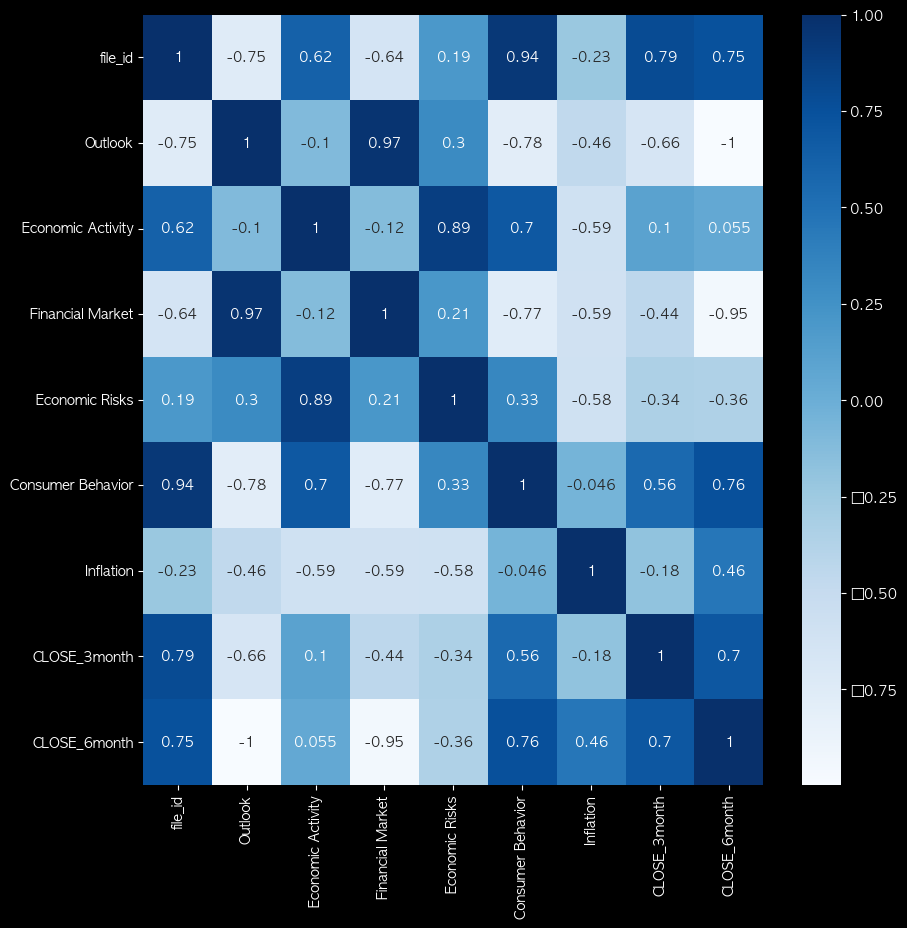

In [241]:
sns.heatmap(df_merge.corr(), annot=True, cmap='Blues')


plt.gcf().set_size_inches(10,10)

In [244]:
df_merge

,file_id,Outlook,Economic Activity,Financial Market,Economic Risks,Consumer Behavior,Inflation,CLOSE_3month,CLOSE_6month
0,20210127,0.073134,-0.037173,-0.004739,-0.037338,-0.112140,-0.030478,17.416190,17.603333
1,20210317,0.020324,-0.014581,-0.043937,-0.010748,-0.076112,0.001976,16.956818,19.824762
2,20210428,0.062876,0.013302,-0.012473,0.029464,-0.074848,-0.068668,17.603333,17.871429
3,20210616,-0.007464,-0.011473,-0.046210,-0.032050,-0.061317,-0.030984,19.824762,21.354545
